<a href="https://colab.research.google.com/github/fariaswladimir/PLSSEM/blob/main/PLSSEM_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: quero usar a base /content/Survey Data.xlsx

library(readxl)
df <- read.csv('/content/df_numerico.csv')
head(df)


,Company_Type,Position,Experience_Years,Country,Team_Size,Priority_Adjust,Meet_Deadlines,Budget_Overrun,Budget_Reduced,Goals_Met,Stakeholder_Satisfaction,Team_Admit_Mistakes,Tensions_Unresolved,Conflicting_Situations,Role_Mismatch,Methodology_Efficiency,Tools_Appropriateness,Documents_Quality,Interests_Conflict
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Corporate,"Experienced Professional (Developer, Tester, Analyst, Consultant, etc.)",2 - 5 years,Serbia,<20,4,4,2,2,3,5,5,2,3,2,4,5,5,3
2,Corporate,Entry Level and Working Students,Less than 2 years,Milan,<10,3,4,4,1,4,4,4,2,2,2,4,4,5,1
3,Corporate,"Middle Level Manager (Project Manager, Product Manager, Program Manager, etc.)",5 -10 years,Serbia,<10,4,4,2,2,3,4,4,2,3,2,4,4,4,2
4,Corporate,"Experienced Professional (Developer, Tester, Analyst, Consultant, etc.)",2 - 5 years,Serbia,<10,3,4,1,1,4,4,5,2,1,2,4,4,4,1
5,Start-up,"Executive Manager (CFOs, CEOs, Co-Founders)",5 -10 years,Serbia,<10,4,2,3,2,5,5,4,2,3,3,4,2,1,2
6,Corporate,Entry Level and Working Students,2 - 5 years,Switzerland,<20,4,3,3,2,3,4,5,3,4,2,2,4,3,2


In [ ]:
# prompt: drop as colunas que não são int

df_numerico <- df[, sapply(df, is.numeric)]
head(df_numerico)


,Priority_Adjust,Meet_Deadlines,Budget_Overrun,Budget_Reduced,Goals_Met,Stakeholder_Satisfaction,Team_Admit_Mistakes,Tensions_Unresolved,Conflicting_Situations,Role_Mismatch,Methodology_Efficiency,Tools_Appropriateness,Documents_Quality,Interests_Conflict
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,4,2,2,3,5,5,2,3,2,4,5,5,3
2,3,4,4,1,4,4,4,2,2,2,4,4,5,1
3,4,4,2,2,3,4,4,2,3,2,4,4,4,2
4,3,4,1,1,4,4,5,2,1,2,4,4,4,1
5,4,2,3,2,5,5,4,2,3,3,4,2,1,2
6,4,3,3,2,3,4,5,3,4,2,2,4,3,2


In [ ]:
install.packages("plspm")
library(plspm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tester’, ‘turner’, ‘diagram’, ‘shape’, ‘amap’




In [ ]:
# Matriz de relações entre variáveis latentes
path_matrix <- rbind(
  c(0, 0, 0),  # proj_suc
  c(1, 0, 0),  # hrc
  c(1, 0, 0)   # nhrc
)
colnames(path_matrix) <- rownames(path_matrix) <- c("proj_suc", "hrc", "nhrc")


In [ ]:
# Lista de blocos de medidas
blocks <- list(
  c("Priority_Adjust", "Meet_Deadlines", "Budget_Overrun", "Goals_Met", "Stakeholder_Satisfaction"),  # Indicadores para proj_suc
  c("Team_Admit_Mistakes", "Tensions_Unresolved", "Conflicting_Situations", "Role_Mismatch"),  # Indicadores para hrc
  c("Methodology_Efficiency", "Tools_Appropriateness", "Documents_Quality")  # Indicadores para nhrc
)


In [ ]:

# Modos de mensuração (A = reflexivo)
modes <- c("A", "A", "A")


In [ ]:
# Ajustar o modelo PLS-SEM
resultados <- plspm(df_numerico, path_matrix, blocks, modes)


In [ ]:
# Sumário dos resultados
summary(resultados)

# Coeficientes do caminho
resultados$path_coefs

# Loadings
resultados$outer_model

# Communality
resultados$communality

# Redundancy
resultados$redundancy

# Goodness-of-Fit
resultados$gof


PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      107 
2   Latent Variables     3 
3   Manifest Variables   12 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     centroid 
7   Tolerance Crit       1e-06 
8   Max Num Iters        100 
9   Convergence Iters    6 
10  Bootstrapping        FALSE 
11  Bootstrap samples    NULL 

---------------------------------------------------------- 
BLOCKS DEFINITION 
       Block         Type   Size   Mode
1   proj_suc    Exogenous      5      A
2        hrc   Endogenous      4      A
3       nhrc   Endogenous      3      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
          Mode  MVs  C.alpha  DG.rho  eig.1st  eig.2nd
proj_suc     A    5    0.374   0.635     2.22    0.874
hrc          A    4    0.000   0.437     2.09    0.957
nhrc         A    3    0.562 

,proj_suc,hrc,nhrc
proj_suc,0.0000000,0,0
hrc,-0.5640127,0,0
nhrc,0.4189007,0,0


,name,block,weight,loading,communality,redundancy
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Priority_Adjust,proj_suc,0.32739888,0.7030178,0.49423401,0.000000000
2,Meet_Deadlines,proj_suc,0.33093352,0.7384823,0.54535605,0.000000000
3,Budget_Overrun,proj_suc,-0.28143085,-0.5764687,0.33231614,0.000000000
4,Goals_Met,proj_suc,0.19634938,0.5136207,0.26380623,0.000000000
5,Stakeholder_Satisfaction,proj_suc,0.34513381,0.7601662,0.57785260,0.000000000
6,Team_Admit_Mistakes,hrc,-0.44590293,-0.8250080,0.68063814,0.216517989
7,Tensions_Unresolved,hrc,0.45449657,0.8812657,0.77662929,0.247053760
8,Conflicting_Situations,hrc,0.31059108,0.7531575,0.56724620,0.180446846
9,Role_Mismatch,hrc,-0.01562157,0.1491352,0.02224129,0.007075184


NULL

NULL

[1] 0.3463509

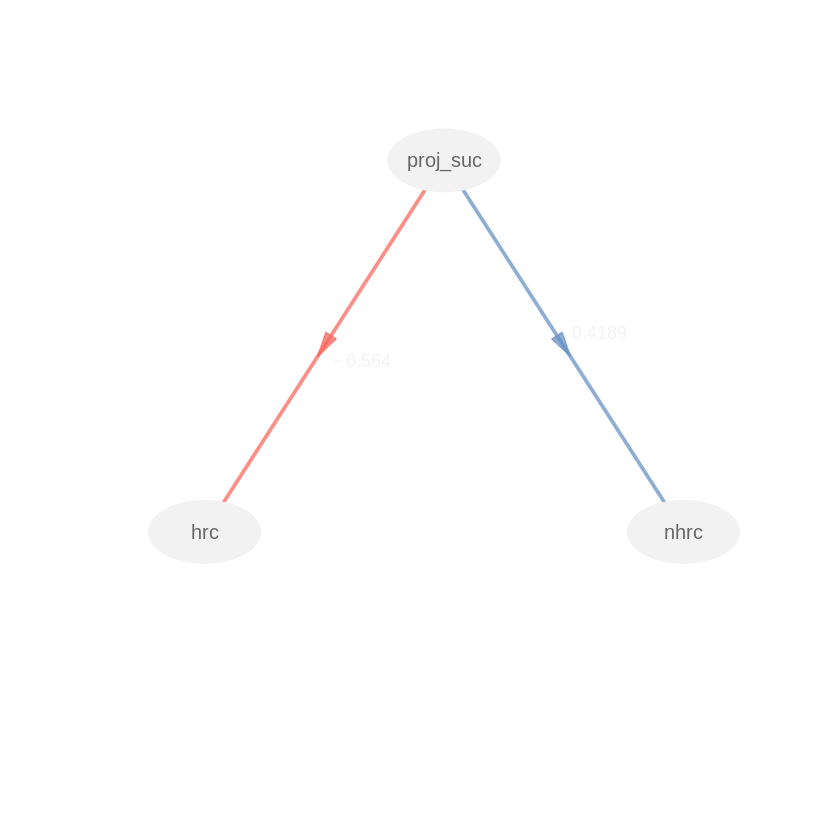

In [ ]:

# Plotar o diagrama do modelo PLS-SEM
plot(resultados)

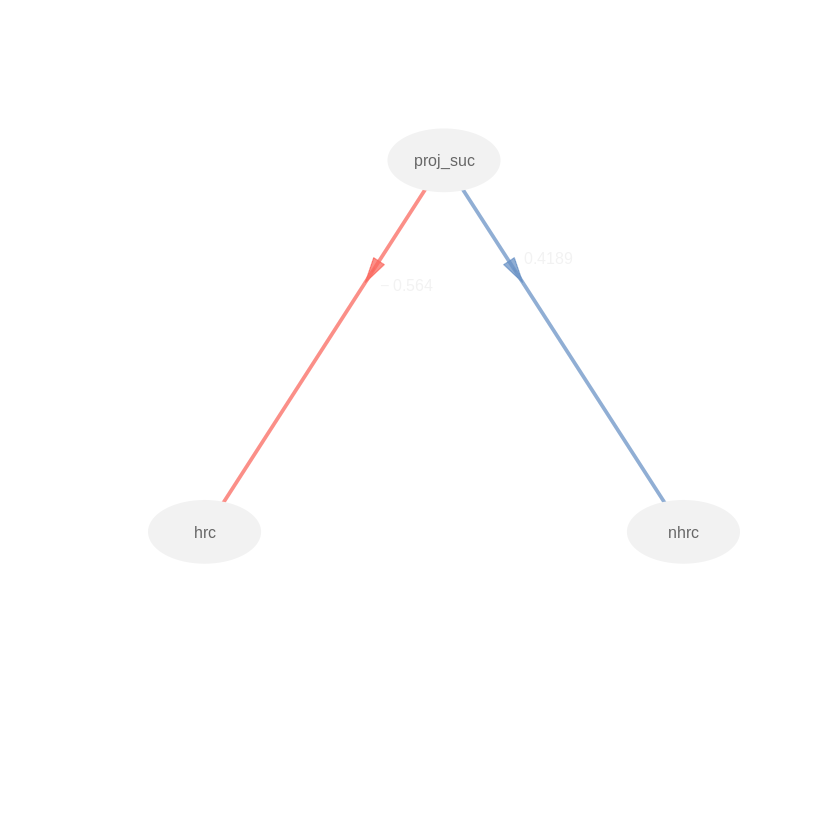

In [ ]:
# Plotar o diagrama com opções personalizadas
plot(resultados, what = "paths", arr.pos = 0.3, box.cex = 0.8, lwd = 1, cex.txt = 0.8)
